Если под рукой нет средств для отрисовки структуры базы данных, то можно воспользоваться graphviz.

Для этого нужно подготовить excel-файл.

- Т1 - название таблицы
- С1 - название столбцов таблицы


К Т1 и С1 подписываются таблица и столбец (Т2, C2), по которым они соединяются.

In [ ]:
!pip install graphviz

In [1]:
import pandas as pd
import warnings
import os
from graphviz import Digraph

#Нужно скачать graphviz с оф сайта
os.environ['PATH'] += r';C:\Users\Роман\Downloads\windows_10_msbuild_Release_graphviz-3.0.0-win32\Graphviz\bin'
warnings.simplefilter('ignore')


df = pd.read_excel("1.xlsx", dtype=str)
df.head()

,T1,C1,T2,C2
0,A,fkeyA,NaN,NaN
1,A,alpha,NaN,NaN
2,A,beta,NaN,NaN
3,B,BkeyA,A,fkeyA
4,B,count,NaN,NaN


In [2]:
start = '<<table border="0" cellborder="1" cellspacing="0" cellpadding="4">'
end = '</table>>'
node_table = df.groupby('T1')['C1'].apply(lambda x: ''.join([f'<tr><td port="{i}" align="left">{i}</td></tr>' for i in x]) + end)

In [3]:
node_table = node_table.to_frame().reset_index().rename(columns={'T1': 'node', 'C1': 'label'})
node_table['node'] = node_table['node'].apply(lambda x: '[' + x + ']')
node_table['label'] = start + node_table["node"].apply(lambda x: f'<tr><td bgcolor="lightblue">{x}</td></tr>') + node_table['label']

In [4]:
edge_table = df[df['T2'].notna()]
edge_table['E1'] = edge_table['T1'].apply(lambda x: '[' + x + ']') + ':' + edge_table['C1']#edge_table['num'].astype(str)
edge_table['E2'] = edge_table['T2'].apply(lambda x: '[' + x + ']') + ':' + edge_table['C2']#edge_table['num'].astype(str)
edge_table.drop(columns=['T1', 'T2', 'C1', 'C2'], inplace=True)

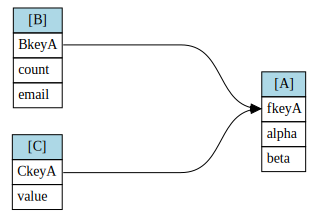

In [5]:
#отрисовка
g=Digraph('structs',format='png')
g.attr(rankdir="LR", overlap="false", splines="true")
g.attr('node', shape='plaintext')
g.attr(size='100')

for _, row in node_table.iterrows():
    node_ = row['node']
    node_label = row['label']
    g.node(node_,label=node_label)
    
for _, row in edge_table.iterrows():
    edge1 = row['E1']
    edge2 = row['E2']
    g.edge(edge1,edge2, minlen='5')

g